## Build Your First Neural Network with PyTorch
Copyright 2022, LEAKY.AI LLC

<pre>
Level: Beginner
Time:  30 minutes
Equipment: Google Chrome Browser
</pre>
### Overview
This free tutorial is intended for anyone curious about building their own A.I. projects. In this tutorial, you will build a neural network from scratch and train it to make Lemonade sales predictions using a simple, synthetic dataset.   You will be introduced to PyTorch, a deep learning library managed by Meta's AI group, powering lots of A.I. applications around the world today.

### Dataset – A Simple Lemonade Sales Synthetic Dataset
We will be working on a synthetic dataset that catalogs the daily number of lemonades sold at a lemon stand. After training, your neural network will be able to predict the number of lemonades sold on any given day.

### How to Get Started
You can find the full tutorial and follow along coding the notebook here:  (it’s free)
https://www.leaky.ai/buildyourfirstneuralnetwork


### Option 1 – Use Google Colab (Simplest Way)
In order to complete this assignment:
1.	Copy the following link: https://github.com/LeakyAI/FirstNeuralNet
2.	Head over to Colab: https://colab.research.google.com/
3.	Click on GitHub and paste in the repo link from (1) above
4.	Click the magnify icon on the right side of the link you pasted above
5.	Click on the FirstNeuralNetwork - Start Here.ipynb notebook and the notebook will open
6.	Follow along the tutorial to complete the notebook

### Option 2 – Run Notebook Directly on your Own Machine
If you want to use your own laptop or desktop to run the notebook locally, we recommend you complete the tutorial on How to Configure your PC for A.I. first which you can find here:

#### How to Configure your PC for A.I. (20 Minutes)
https://www.leaky.ai/configure-pc-for-ai-20-minutes

Then attempt this tutorial by opening up the notebook FirstNeuralNetwork - Start Here.ipynb and follow along the video.

Let’s get started!

## Step 1 - Setup our Environment
Let's start by importing the software libraries we will need to build our neural network.  We will import PyTorch and check the version of PyTorch that has been imported.  You will usually want to run the latest version.  You can always check the latest version by heading over to PyTorch.org:
    
    https://pytorch.org/

In [1]:
# Import PyTorch libraries
import torch
from torch import nn

# Import visualization library
import matplotlib.pyplot as plt

# Verify PyTorch version
torch.__version__

'2.1.0+cu121'

### Check Our Processing Capability (CPU vs. GPU)
When developing A.I. projects, it will help to have a powerful GPU.  While this project does not require one, the code below will detect if one is present in your environment and use it during the training process.

In [2]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


## Step 2 - Download and Prepare our Dataset
When training a neural network from scratch, you will usually need a lot of data.  We will start by loading all the lemonade stand data for one year (365 items) which is a rather small, simply synthetic dataset.  It includes information about the day the lemonade was sold including whether or not it was a weekend, sunny, warm, a big sign was present to advertise and the price.  Finally, there is the number of lemonade's sold.  Our neural network will be trained to predict the number of lemonade's sold (output) based on the other attributes (inputs).

In [4]:
# Use Pandas to do our dataprocessing on the dataset
# Download the dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/LeakyAI/FirstNeuralNet/main/lemons.csv'
df = pd.read_csv(url)

# Explore the first 10 rows of the dataset
df.head(10)

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,9,71
1,1,1,1,0,10,137
2,0,1,0,0,10,0
3,1,0,0,1,6,107
4,1,0,0,1,8,80
5,1,1,0,0,6,110
6,1,1,1,0,8,167
7,0,0,1,1,8,0
8,1,0,1,0,8,124
9,1,1,0,0,7,95


In [5]:
# Check the size/shape of our dataset
df.shape

(365, 6)

### Create our Inputs and Outputs for Training our Neural Network

The data has been collected in a table with the following columns:  

<pre> Weekend Sunny Warm BigSign Price NumberSold</pre>

While the dataset is more or less ready to be used, we have two fields (Price and NumberSold) that contain real values.  Usually, it's easier to train neural networks if the values used are in the range rough range of -1..1.  We will first reduce the range of Price and NumberSold down using standardization.

In [8]:
# Calculate the mean and standard deviation of price
# Standardize numSold
priceMean = df['Price'].mean()
priceStd = df['Price'].std()
df['Price'] = (df['Price']-priceMean)/priceStd

# Calculate the mean and standard deviation of numSold
# Standardize numSold
numSoldMean = df['NumberSold'].mean()
numSoldStd = df['NumberSold'].std()
df['NumberSold'] = (df['NumberSold']-numSoldMean)/numSoldStd

In [9]:
df.head()

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,0.846650,-0.023669
1,1,1,1,0,1.452587,0.743734
2,0,1,0,0,1.452587,-0.849208
3,1,0,0,1,-0.971158,0.394915
4,1,0,0,1,0.240714,0.080977


### Create our Input (x) and Ouput (y) to Train our Neural Network

Here you will create the input (x) and output (y) variables needed to train our network.  The number we want our neural network to predict is the field called 'NumberSold'.  This will be the output (y).  We will need to seperate out our input (Weekend, Sunny, Warm, BigSign, Price) from the ouput (NumberSold).

In [11]:
# Create our PyTorch tensors and move to CPU or GPU if available
# Extract the inputs and create a PyTorch tensor x (inputs)
inputs = ['Weekend', 'Sunny', 'Warm', 'BigSign', 'Price']
x = torch.tensor(df[inputs].values, dtype=torch.float, device=device)

# Extract the outputs and create a PyTorch tensor y (outputs)
outputs = ['NumberSold']
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

In [12]:
# Explore the first 5 inputs
x[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

In [13]:
# Explore the first 5 outputs
y[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]])

## Step 3 - Build your Neural Network
Below you will build a simply neural network that will take in the inputs above (5) and produce a single value as an output.  This network has a single hidden layer of 100 units.

In [14]:
# Define your PyTorch neural network
# Number of Inputs: 5
# Number of Hidden Units: 100
# Number of Hidden Layers: 1
# Activation Function:  Relu
# Number of Ouputs: 1
model = nn.Sequential(
            nn.Linear(5, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

# Move it to either the CPU or GPU depending on what we have available
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

## Step 4 - Train your Neural Network

Here we will simply train our neural network on the dataset.  We will provide it with an input and and output.  The training loop will then adjust the weights within the neural network to make it more accuarate as we go through the training process.

In [15]:
import torch.optim as optim

# Meausure our neural network by mean square error
criterion = torch.nn.MSELoss()

# Train our network with a simple SGD approach
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train our network a using the entire dataset 5 times
for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):

        # Single Forward Pass
        ypred = model(x[i])

        # Measure how well the model predicted vs actual
        loss = criterion(ypred, y[i])

        # Track how well the model predicted
        totalLoss+=loss.item()

        # Update the neural network
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration
    print ("Total Loss: ", totalLoss)

Total Loss:  138.46770509754828
Total Loss:  8.54888665987474
Total Loss:  5.156720504531478
Total Loss:  3.7648334382940476
Total Loss:  3.257410303461942


## Step 5 - Analyze the Network's Performance

In [16]:
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):

    model.eval()                               # Set the model to inference mode

    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):

        # Single forward pass
        pred = model(x[i])

        # Un-normalize our prediction
        pred = pred*numSoldStd+numSoldMean
        act = y[i]*numSoldStd+numSoldMean

        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Lemonades Sold')
    plt.ylabel('Predicted Lemonades Sold')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

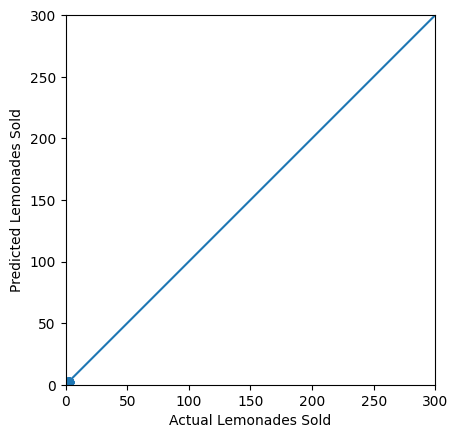

In [17]:
graphPredictions(model, x, y, 0, 300)

## Step 6 - Test with Your Own Predictions
Below we makeup some input data and see what our predictions should be vs what the neural network predicted.

In [18]:
# Below we use the synthetic data generator forumla to
# determine what the actual result should have been.
def datasetGenerator(weekend, sunny, warm, bigsign, price):
    numlemonssold = 0
    if weekend:
        numlemonssold = (sunny*5  + int(500 / price))
        if bigsign:
            numlemonssold = 1.3 * numlemonssold
        if warm:
            numlemonssold = 2 * numlemonssold
        if sunny:
            numlemonssold = 1.25 * numlemonssold
    numlemonssold = int(numlemonssold)
    return numlemonssold

In [19]:
# Data that affects the number of lemons sold in one day
weekend = 1
sunny = 0
warm = 0
bigsign = 1
price = 5

# Calculate what would have been the actual result using
# the synthetic dataset's algorithm
actual = datasetGenerator(weekend, sunny, warm, bigsign, price)

# Use the CPU as we just need to do a single pass
model.to('cpu')

# Normalize our inputs using the same values for our training
price = (price - priceMean)/priceStd

# Create our input tensor
x1 = torch.tensor([weekend, sunny, warm, bigsign, price],dtype=float)

# Pass the input into the neural network
y1 = model(x1.float())

# Un-normalize our output y1
y1 = y1*numSoldStd+numSoldMean

# Compare what your network predicted to the actual
print ("Neural Network Predicts: ", y1.item())
print ("Actual Result: ", actual)

Neural Network Predicts:  -0.9544925689697266
Actual Result:  130


## Next Steps
This is just a beginning but hopefully you can see the power of neural networks!  There are lots of additional things you would do to the project above to make it better including:

1.  Break the dataset up into a training, validation and testing set
2.  Use a real-world dataset
3.  Tune the training to be a lot more accurate

To learn more, head over to www.leaky.ai for more free tutorials.

Also, check-out our Introduction to A.I. Programming Course at https://www.leaky.ai/introduction-to-ai-programming-with-pytorch-course-beginner where you can learn everything you need to know to start building your own A.I. projects!

Happy Learning!

leaky.ai team